In [1]:
!pip install tensorflow==2.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [5]:
!pip install pillow

In [6]:
from PIL import Image

In [7]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 5, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
import os

In [11]:
training_set = train_datagen.flow_from_directory(r'E:\ineuron\Deep Learning\CNN\relatives',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 70 images belonging to 5 classes.


In [12]:
test_set = test_datagen.flow_from_directory(r'E:\ineuron\Deep Learning\CNN\relatives',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 70 images belonging to 5 classes.


In [13]:
model = classifier.fit_generator(training_set,
                         steps_per_epoch = 800,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 200)

800/800 [==============================] - 1956s 2s/step - loss: 0.1503 - accuracy: 0.9586 - val_loss: 0.0010 - val_accuracy: 1.0000


In [14]:
classifier.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
pwd

'C:\\Users\\User\\Desktop\\New folder'

In [16]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [60]:
test_image = image.load_img(r'C:\Users\User\Desktop\test\5.jpg', target_size = (64, 64))

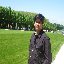

In [61]:
test_image

In [62]:
test_image = image.img_to_array(test_image)

In [63]:
test_image = np.expand_dims(test_image, axis = 0)


In [64]:
result = classifier.predict(test_image)

In [65]:
result

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [66]:
result[0]

array([0., 0., 0., 0., 1.], dtype=float32)

In [68]:
training_set.class_indices
if result[0][0] == 1:
    prediction = 'bobby'
    print(prediction)
if result[0][1] == 1:
    prediction = 'manjusha'
    print(prediction)
if result[0][2] == 1:
    prediction = 'nikki'
    print(prediction)
if result[0][3] == 1:
    prediction = 'prasad'
    print(prediction)
else:
    prediction = 'ravi'
    print(prediction)

ravi
